In [170]:
import pandas as pd
import time
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix 
import patsy
from patsy import dmatrices,dmatrix
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn import preprocessing, tree, ensemble, linear_model, metrics, model_selection, svm
import statsmodels.api as sm
from sklearn.metrics import *
from sklearn.cross_validation import *
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.cross_validation import *

In [171]:
df1=pd.read_csv('df1_clean.csv')

In [172]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,code1,code2,code3,readmit
0,0,0,2278392,8222157,3,0,0,6,25,1,...,No,No,No,1,0,NO,2,0,Undefined,0
1,1,1,149190,55629189,3,0,1,1,1,7,...,No,No,No,0,1,>30,7,2,neoplasm,0
2,2,2,64410,86047875,1,0,2,1,1,7,...,No,No,No,1,1,NO,8,2,Undefined,0
3,3,3,500364,82442376,3,1,3,1,1,7,...,No,No,No,0,1,NO,0,2,circulatory,0
4,4,4,16680,42519267,3,1,4,1,1,7,...,No,No,No,0,1,NO,7,7,diabetes,0


In [173]:
X1=df1[['race','gender','age','admission_type_id','discharge_disposition_id',
     'admission_source_id','time_in_hospital','num_lab_procedures',
     'num_procedures','num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses', 'max_glu_serum',
       'A1Cresult','insulin','change',
       'diabetesMed', 'code1']]

In [221]:
y1=df1['readmit']

In [225]:
X1train,X1test,y1train,y1test = train_test_split(X1,y1,test_size=0.3, random_state=42)

In [226]:
dtree = tree.DecisionTreeClassifier()
clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=500)
ada = ensemble.AdaBoostClassifier(n_estimators=100)
sgd = linear_model.SGDClassifier(loss='log')
gb = ensemble.GradientBoostingClassifier(n_estimators=50)
nn = MLPClassifier()
gnb = GaussianNB()
logreg=LogisticRegression()

In [227]:
#multiple models with model score
st = time.time()
for model, name in zip([dtree,clf,sgd, ada,gb,nn,gnb,logreg], ['Decisin Tree','Random Forest','SGD', 'Ada Boost','Gradient Boosting','Neural Networks','Gaussian Naive Bayes','logreg']):
    model.fit(X1train,y1train)
#     predict = model.predict_proba(X1test)
    score = model.score(X1test, y1test)
    print name, score
et = time.time()
tt = et - st
print "Total Time = " + str(tt)

Decisin Tree 0.793028249346
Random Forest 0.888881433268
SGD 0.123733476481
Ada Boost 0.888445279474
Gradient Boosting 0.888881433268
Neural Networks 0.889351137355
Gaussian Naive Bayes 0.858887472321
logreg 0.889049184728
Total Time = 49.3822870255


In [178]:
# multiple models - AUC score
st = time.time()
for model, name in zip([dtree,clf,sgd, ada,gb,nn,gnb,logreg], ['dtree','clf','sgd', 'ada','gb','nn','gnb','logreg']):
    model.fit(X1train,y1train)
    predict = model.predict_proba(X1test)
    score = metrics.roc_auc_score(y1test, predict[:,1])
    print name, score
et = time.time()
tt = et - st
print "Total Time = " + str(tt)

dtree 0.533188582667
clf 0.645580325087
sgd 0.578820433639
ada 0.661485581778
gb 0.662320260553
nn 0.646235467268
gnb 0.635260617754
logreg 0.647957498307
Total Time = 52.2535068989


In [181]:
importances = pd.DataFrame(zip(
                            dtree.fit(X1,y1).feature_importances_,
#                                clf.fit(X1,y1).feature_importances_,
#                                ada.fit(X1,y1).feature_importances_,
                                gb.fit(X1,y1).feature_importances_),
                               
                           index=X1.columns,
                           columns=[
                                   'dtree',
#                                     'rf','ada',
                                    'gb']).sort_values('gb')

In [182]:
importances

,dtree,gb
gender,0.026405,0.000000
change,0.019639,0.000000
admission_source_id,0.026706,0.000000
max_glu_serum,0.007487,0.000000
race,0.032868,0.003719
num_procedures,0.057514,0.004647
number_outpatient,0.031168,0.007586
A1Cresult,0.027273,0.008015
diabetesMed,0.016068,0.020456
insulin,0.040049,0.024570


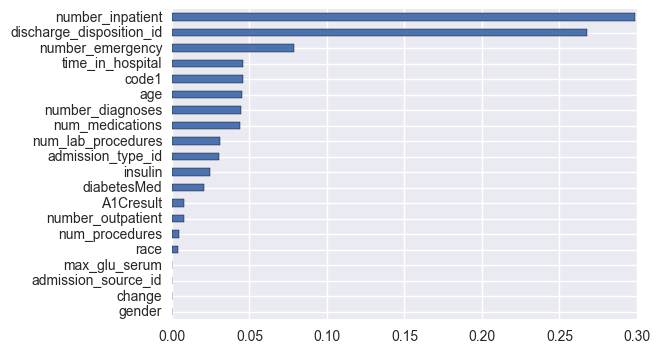

In [183]:
importances.gb.plot(kind='barh')

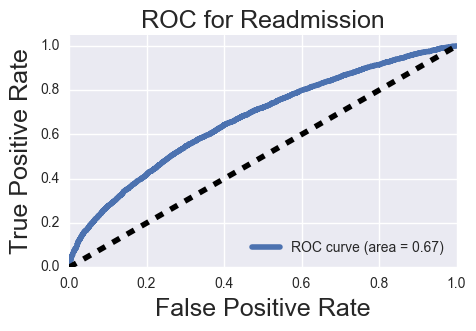

In [184]:
y_score = gb.predict_proba(X1test)[:,1]


FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], thresholds = roc_curve(y1test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[5,3])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Readmission', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [185]:
y1test.value_counts()

0    26494
1     3312
Name: readmit, dtype: int64

In [186]:
gb_model= gb.fit(X1train,y1train)

In [187]:
gb_y1pred = gb_model.predict(X1test)

In [ ]:
gb_predict_proba = gb_model.predict_proba(X1test)

In [190]:
confusion_matrix(y1test,gb_y1pred)

array([[26466,    28],
       [ 3284,    28]])

In [192]:
print classification_report(y1test,gb_y1pred)

             precision    recall  f1-score   support

          0       0.89      1.00      0.94     26494
          1       0.50      0.01      0.02      3312

avg / total       0.85      0.89      0.84     29806



In [193]:
gb_y1pred_prob = pd.DataFrame(gb_model.predict_proba(X1test), columns=['class_0_pp','class_1_pp'])

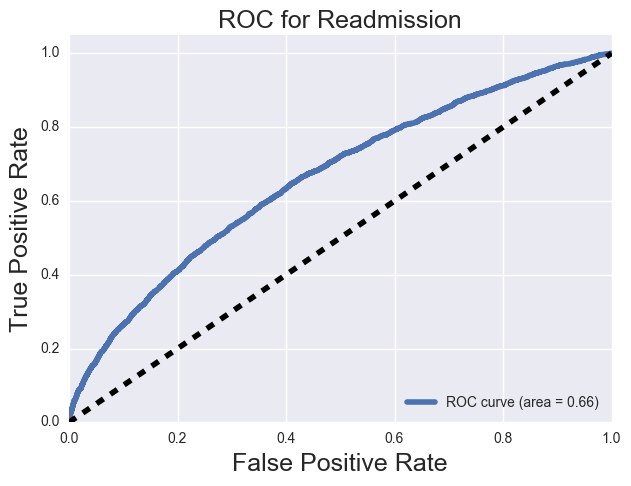

In [214]:
y_score = gb_model.predict_proba(X1test)[:,1]


FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], thresholds = roc_curve(y1test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[7,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Readmission', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [195]:
print(gb_y1pred_prob.iloc[0:10])

   class_0_pp  class_1_pp
0    0.937515    0.062485
1    0.908748    0.091252
2    0.941623    0.058377
3    0.886788    0.113212
4    0.910666    0.089334
5    0.954536    0.045464
6    0.901875    0.098125
7    0.868699    0.131301
8    0.920525    0.079475
9    0.925005    0.074995


In [196]:
gb_y1pred_prob['pred_class_thresh50'] = gb_y1pred

# print(gb_y1pred_prob.iloc[0:50])

gb_y1pred_prob.pred_class_thresh50.value_counts()

0    29750
1       56
Name: pred_class_thresh50, dtype: int64

In [201]:
gb_y1pred_prob['pred_class_thresh10'] = [1 if x >= 0.10 else 0 for x in gb_y1pred_prob.class_1_pp.values]
print(gb_y1pred_prob.iloc[0:10])

   class_0_pp  class_1_pp  pred_class_thresh50  pred_class_thresh10
0    0.937515    0.062485                    0                    0
1    0.908748    0.091252                    0                    0
2    0.941623    0.058377                    0                    0
3    0.886788    0.113212                    0                    1
4    0.910666    0.089334                    0                    0
5    0.954536    0.045464                    0                    0
6    0.901875    0.098125                    0                    0
7    0.868699    0.131301                    0                    1
8    0.920525    0.079475                    0                    0
9    0.925005    0.074995                    0                    0


In [200]:
gb_y1pred_prob.pred_class_thresh10.value_counts()

0    29750
1       56
Name: pred_class_thresh10, dtype: int64

In [125]:
X1test['y1test']=y1test

/Users/user/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [126]:
new_index=X1test.index

In [127]:
X1test['new_ind'] = new_index

/Users/user/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [128]:
gb_y1pred_prob['new_ind']=new_index

In [99]:
# pd.merge(X1test, gb_y1pred_prob, right_index=True, left_index=True)

In [129]:
gb_y1pred_prob

,class_0_pp,class_1_pp,pred_class_thresh50,pred_class_thresh10,new_ind
0,0.937515,0.062485,0,0,83846
1,0.908748,0.091252,0,0,28241
2,0.941623,0.058377,0,0,37536
3,0.886788,0.113212,0,1,32112
4,0.910666,0.089334,0,0,80515
5,0.954536,0.045464,0,0,50595
6,0.901875,0.098125,0,0,85488
7,0.868699,0.131301,0,1,30300
8,0.920525,0.079475,0,0,47097
9,0.925005,0.074995,0,0,97879


In [131]:
X1test

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,code1,y1test,new_ind
83846,1,0,3,1,1,7,2,45,0,9,...,0,9,2,2,1,1,0,8,0,83846
28241,3,0,7,3,1,1,4,64,1,28,...,0,9,2,1,0,0,1,1,0,28241
37536,3,0,2,1,1,7,1,32,0,10,...,0,3,2,2,3,0,1,2,0,37536
32112,4,1,5,1,2,7,2,41,0,9,...,0,7,2,2,2,0,1,1,0,32112
80515,3,1,6,2,1,4,7,30,0,23,...,0,9,2,2,2,1,1,1,0,80515
50595,3,0,5,3,1,1,1,9,1,3,...,0,4,2,2,1,1,0,4,0,50595
85488,3,1,4,3,6,1,7,11,1,14,...,0,9,2,2,1,1,0,7,0,85488
30300,3,0,8,6,3,7,6,50,0,7,...,0,6,3,0,1,1,0,1,1,30300
47097,3,1,6,1,1,7,4,38,1,21,...,0,9,2,2,2,0,1,3,0,47097
97879,3,0,5,3,1,1,6,30,3,19,...,0,8,2,2,2,1,1,3,0,97879


In [132]:
gb_y1pred_prob

,class_0_pp,class_1_pp,pred_class_thresh50,pred_class_thresh10,new_ind
0,0.937515,0.062485,0,0,83846
1,0.908748,0.091252,0,0,28241
2,0.941623,0.058377,0,0,37536
3,0.886788,0.113212,0,1,32112
4,0.910666,0.089334,0,0,80515
5,0.954536,0.045464,0,0,50595
6,0.901875,0.098125,0,0,85488
7,0.868699,0.131301,0,1,30300
8,0.920525,0.079475,0,0,47097
9,0.925005,0.074995,0,0,97879


In [134]:
# the data for X1test with y1test and the predictions are all merged
prediction_whole = pd.merge(X1test, gb_y1pred_prob, on='new_ind')

In [135]:
prediction_whole

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,change,diabetesMed,code1,y1test,new_ind,class_0_pp,class_1_pp,pred_class_thresh50,pred_class_thresh10
0,1,0,3,1,1,7,2,45,0,9,...,1,1,0,8,0,83846,0.937515,0.062485,0,0
1,3,0,7,3,1,1,4,64,1,28,...,0,0,1,1,0,28241,0.908748,0.091252,0,0
2,3,0,2,1,1,7,1,32,0,10,...,3,0,1,2,0,37536,0.941623,0.058377,0,0
3,4,1,5,1,2,7,2,41,0,9,...,2,0,1,1,0,32112,0.886788,0.113212,0,1
4,3,1,6,2,1,4,7,30,0,23,...,2,1,1,1,0,80515,0.910666,0.089334,0,0
5,3,0,5,3,1,1,1,9,1,3,...,1,1,0,4,0,50595,0.954536,0.045464,0,0
6,3,1,4,3,6,1,7,11,1,14,...,1,1,0,7,0,85488,0.901875,0.098125,0,0
7,3,0,8,6,3,7,6,50,0,7,...,1,1,0,1,1,30300,0.868699,0.131301,0,1
8,3,1,6,1,1,7,4,38,1,21,...,2,0,1,3,0,47097,0.920525,0.079475,0,0
9,3,0,5,3,1,1,6,30,3,19,...,2,1,1,3,0,97879,0.925005,0.074995,0,0


In [228]:
prediction_whole.columns

Index([u'race', u'gender', u'age', u'admission_type_id',
       u'discharge_disposition_id', u'admission_source_id',
       u'time_in_hospital', u'num_lab_procedures', u'num_procedures',
       u'num_medications', u'number_outpatient', u'number_emergency',
       u'number_inpatient', u'number_diagnoses', u'max_glu_serum',
       u'A1Cresult', u'insulin', u'change', u'diabetesMed', u'code1',
       u'y1test', u'new_ind', u'class_0_pp', u'class_1_pp',
       u'pred_class_thresh50', u'pred_class_thresh10'],
      dtype='object')

In [231]:
prediction_whole.number_inpatient.value_counts()

0     19932
1      5628
2      2183
3      1004
4       464
5       233
6       146
7        80
8        51
9        32
11       13
10       13
12       11
15        4
14        4
13        4
19        1
18        1
16        1
21        1
Name: number_inpatient, dtype: int64

In [165]:
# prediction_whole.to_csv('prediction_whole.csv')

In [215]:
# thresholds for TPR of 80%, 85%, 90%, 95%, and 100%
thresh = [[th for t, f, th in zip(TPR[1], FPR[1], thresholds) if t >= i][0] for i in [.1,.6,.7,.8, .85, .9, .95, 1]]

In [216]:
thresh

[0.24218970210836568,
 0.11720289921192702,
 0.10480040102412176,
 0.08279044078701002,
 0.076495514550293936,
 0.070404471860287726,
 0.063503508719681051,
 0.043811922592248968]

In [217]:
# Print confusion matrix for each threshold corresponding to the TPRs above.
for i in thresh:
    predictions = [1 if p >= i else 0 for p in y_score]
    print 'threshold:', i
    print metrics.confusion_matrix(y1test, predictions)
    print metrics.classification_report(y1test,predictions)
    print ''

threshold: 0.242189702108
[[25865   629]
 [ 2980   332]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.93     26494
          1       0.35      0.10      0.16      3312

avg / total       0.84      0.88      0.85     29806


threshold: 0.117202899212
[[16774  9720]
 [ 1324  1988]]
             precision    recall  f1-score   support

          0       0.93      0.63      0.75     26494
          1       0.17      0.60      0.26      3312

avg / total       0.84      0.63      0.70     29806


threshold: 0.104800401024
[[13836 12658]
 [  993  2319]]
             precision    recall  f1-score   support

          0       0.93      0.52      0.67     26494
          1       0.15      0.70      0.25      3312

avg / total       0.85      0.54      0.62     29806


threshold: 0.082790440787
[[10272 16222]
 [  662  2650]]
             precision    recall  f1-score   support

          0       0.94      0.39      0.55     26494
          1      

In [166]:
prediction_whole.shape

(29806, 26)

In [156]:
prediction_whole[prediction_whole.code1==4].y1test.sum()

137

In [157]:
prediction_whole[prediction_whole.code1==4].pred_class_thresh10.sum()

775

In [158]:
(prediction_whole[prediction_whole.code1==4].pred_class_thresh10==0).sum()

697

In [164]:
for i in range(0,10):
    print i
    print prediction_whole[prediction_whole.code1==i].y1test.sum()
    print prediction_whole[prediction_whole.code1==i].pred_class_thresh10.sum()
    print (prediction_whole[prediction_whole.code1==i].pred_class_thresh10==0).sum()

0
146
681
233
1
985
4733
4093
2
319
1413
1188
3
303
1253
1499
4
137
775
697
5
272
1434
687
6
143
765
708
7
362
1685
1674
8
233
1033
971
9
412
2118
2166


In [25]:
conmat_10 = np.array(confusion_matrix(y1test, gb_y1pred_prob.pred_class_thresh10.values, labels=[0,1]))
conmat_10

array([[13018, 13476],
       [  898,  2414]])

In [35]:
print classification_report(y1test,gb_y1pred_prob.pred_class_thresh10)

             precision    recall  f1-score   support

          0       0.94      0.49      0.64     26494
          1       0.15      0.73      0.25      3312

avg / total       0.85      0.52      0.60     29806



In [26]:
models=[logreg,gb,nn,clf,ada]

In [28]:
# to run multiple models
def model_summary(model, X1, y1):
    cv = model_selection.StratifiedKFold(shuffle=True, n_splits=5)
    scores = model_selection.cross_val_score(model, X1, y1, cv=cv)
    print 'mean cross-val accuracy score: ', scores.mean(), "+/-", scores.std()
    
    y_pred = model_selection.cross_val_predict(model, X1, y1, cv=cv)
   
    print metrics.classification_report(y1, y_pred)
    print metrics.confusion_matrix(y1, y_pred)
    
    y_score = model_selection.cross_val_predict(model, X1, y1, method='predict_proba')[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y1, y_score)
    print 'AUC:', metrics.auc(fpr, tpr)

In [29]:
for model in models:
    model_summary(model, X1, y1)

mean cross-val accuracy score:  0.886042710649 +/- 0.000535770623548
             precision    recall  f1-score   support

          0       0.89      1.00      0.94     88039
          1       0.49      0.02      0.03     11314

avg / total       0.84      0.89      0.84     99353

[[87853   186]
 [11134   180]]
AUC: 0.640336322215
mean cross-val accuracy score:  0.886304387391 +/- 0.000213106400462
             precision    recall  f1-score   support

          0       0.89      1.00      0.94     88039
          1       0.56      0.01      0.02     11314

avg / total       0.85      0.89      0.83     99353

[[87963    76]
 [11218    96]]
AUC: 0.649442724315
mean cross-val accuracy score:  0.886123205684 +/- 0.000311825135607
             precision    recall  f1-score   support

          0       0.89      1.00      0.94     88039
          1       0.44      0.02      0.03     11314

avg / total       0.84      0.89      0.84     99353

[[87800   239]
 [11126   188]]
AUC: 0.63754870

In [30]:
# thresholds for TPR of 80%, 85%, 90%, 95%, and 100%
thresh = [[th for t, f, th in zip(TPR[1], FPR[1], thresholds) if t >= i][0] for i in [.1,.6,.7,.8, .85, .9, .95, 1]]

In [31]:
thresh

[0.25038401703933932,
 0.11540007059139273,
 0.10357231664239769,
 0.081959503818223034,
 0.075758214731790452,
 0.070374989812470229,
 0.063254248006792621,
 0.041238667713844102]

In [32]:
yscore=gb.predict_proba(X1)[:,1]

In [33]:
# Print confusion matrix for each threshold corresponding to the TPRs above.
for i in thresh:
    predictions = [1 if p >= i else 0 for p in yscore]
    print 'threshold:', i
    print metrics.confusion_matrix(y1, predictions)
    print metrics.classification_report(y1,predictions)
    print ''

threshold: 0.250384017039
[[86241  1798]
 [10252  1062]]
             precision    recall  f1-score   support

          0       0.89      0.98      0.93     88039
          1       0.37      0.09      0.15     11314

avg / total       0.83      0.88      0.85     99353


threshold: 0.115400070591
[[54051 33988]
 [ 4255  7059]]
             precision    recall  f1-score   support

          0       0.93      0.61      0.74     88039
          1       0.17      0.62      0.27     11314

avg / total       0.84      0.62      0.69     99353


threshold: 0.103572316642
[[45234 42805]
 [ 3225  8089]]
             precision    recall  f1-score   support

          0       0.93      0.51      0.66     88039
          1       0.16      0.71      0.26     11314

avg / total       0.85      0.54      0.62     99353


threshold: 0.0819595038182
[[33410 54629]
 [ 2119  9195]]
             precision    recall  f1-score   support

          0       0.94      0.38      0.54     88039
          1     

/Users/user/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
